In [2]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer, add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer, Vars
from lowEBMs.Packages.RK4 import rk4alg
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs import moving_average, update_plotstyle
import lowEBMs.Packages.Constants as const
update_plotstyle()

In [7]:
#Load basic configuration
configVolcanic=importer('../Config/EBM1D_VolcanicForcing.ini')
variable_importer(configVolcanic,initialZMT=True)
configVolcanic,Paras=add_sellersparameters(configVolcanic,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)

#update for Spinup and run
variable_importer(configVolcanic,initialZMT=True,control=True)
Spinup_Volcanic=rk4alg(model_equation,configVolcanic['eqparam'],configVolcanic['rk4input'],configVolcanic['funccomp'])

#update for Targetsimulation with Spinup as initial and run
variable_importer(configVolcanic,initialZMT=False,control=False)
Vars.T,Vars.T_global=Spinup_Volcanic[1][-1],Spinup_Volcanic[2][-1]
Data_Volcanic=rk4alg(model_equation,configVolcanic['eqparam'],configVolcanic['rk4input'],configVolcanic['funccomp'])

Loading Configuration from: ../Config/EBM1D_VolcanicForcing.ini
Loading Parameters from: ../Config/Data/SellersParameterization.ini
Starting controlrun with a temperature accuracy of 0.001 K on the GMT over 1000 datapoints.


HBox(children=(IntProgress(value=0, max=100000), HTML(value='')))

Steady State reached after 28624 steps, within 40.693416595458984 seconds
Finished controlrun over 928.4219178082192 years. Runtime: 40.73100161552429 s


HBox(children=(IntProgress(value=0, max=36500), HTML(value='')))

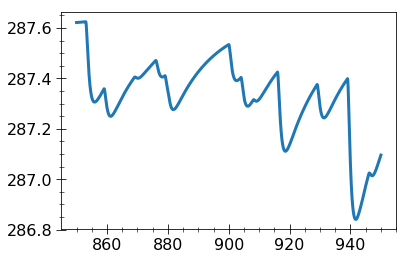

In [8]:
plt.plot(Data_Volcanic[0]/const.time_sec_year,Data_Volcanic[2])